# Librerias

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado
# ==============================================================================
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Importación de Datos

In [2]:
path = ("C:/Users/Usuario/Documents/walter docs/Freelance/Customer Segmentation/Data_calle_score.csv")
datos = pd.read_csv(path, sep=",")
datos

,Clientes,counts,DiasCalle_max,DiasCalle_min,ImporteMedio_h,DiasCalle_h,DiasPago_h,Importe_year,DiasCalle_year,year_dummy_comp,...,Score_comp,DiasCalle,year_dummy_pago,menos_15_y,menos_30_y,menos_45_y,menos_75_y,mas_75_y,Total,Score_pago
0,1,31,253,2,13570.411765,18.941176,0.000000,149565,111,1,...,3,160,1,6,4,0,1,0,11,2
1,2,83,602,3,2920.645833,14.750000,0.000000,140191,708,0,...,4,2374,0,72,6,0,0,5,83,3
2,3,16,78,0,1181.100000,16.400000,3.300000,11811,164,0,...,5,270,0,9,2,4,0,1,16,4
3,4,41,23,0,1639.241379,1.655172,0.000000,47538,48,0,...,1,82,0,40,1,0,0,0,41,1
4,5,1,2,2,982.000000,2.000000,0.000000,982,2,0,...,1,2,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,10070,528,161,0,13527.888000,39.720000,15.920000,1690986,4965,0,...,5,22673,0,82,66,155,167,58,528,5
2435,100067,2,20,17,428581.000000,19.000000,0.000000,428581,19,1,...,2,37,1,0,2,0,0,0,2,2
2436,100748,157,78,0,6004.662338,24.207792,5.051948,207738,105,1,...,2,136,1,17,4,0,0,0,21,2
2437,100749,8,473,0,1788.200000,23.400000,12.600000,8941,117,0,...,3,1070,0,2,0,4,0,2,8,5


# Analisis Exploratorio

In [3]:
clientes = datos.copy()
datos = datos.drop("Clientes", axis = 1)
datos["year_dummy_comp"] = datos["year_dummy_comp"].astype("str") 
datos["year_dummy_pago"] = datos["year_dummy_pago"].astype("str") 
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   counts           2439 non-null   int64  
 1   DiasCalle_max    2439 non-null   int64  
 2   DiasCalle_min    2439 non-null   int64  
 3   ImporteMedio_h   2439 non-null   float64
 4   DiasCalle_h      2439 non-null   float64
 5   DiasPago_h       2439 non-null   float64
 6   Importe_year     2439 non-null   int64  
 7   DiasCalle_year   2439 non-null   int64  
 8   year_dummy_comp  2439 non-null   object 
 9   Total_dias       2439 non-null   int64  
 10  Score_comp       2439 non-null   int64  
 11  DiasCalle        2439 non-null   int64  
 12  year_dummy_pago  2439 non-null   object 
 13  menos_15_y       2439 non-null   int64  
 14  menos_30_y       2439 non-null   int64  
 15  menos_45_y       2439 non-null   int64  
 16  menos_75_y       2439 non-null   int64  
 17  mas_75_y      

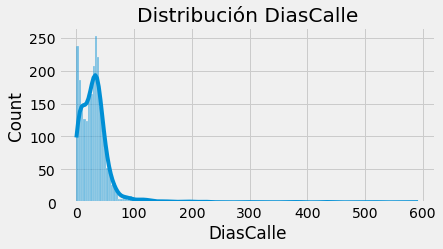

In [4]:
# Distribución variable respuesta
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=datos, x='DiasCalle_h', kde=True,ax=ax)
ax.set_title("Distribución DiasCalle")
ax.set_xlabel('DiasCalle');

IndexError: index 9 is out of bounds for axis 0 with size 9

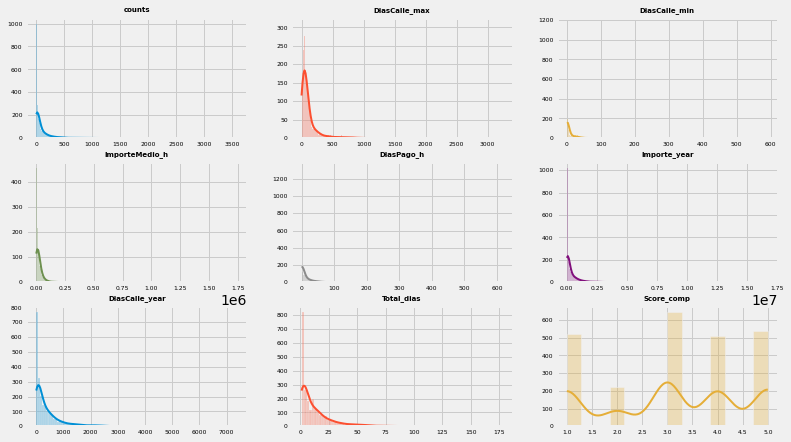

In [5]:
# Gráfico de distribución para cada algunas variables numéricas
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('DiasCalle_h')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [6]:
# Variables cualitativas (tipo object)
# ==============================================================================
datos.select_dtypes(include=['object']).describe()

,year_dummy_comp,year_dummy_pago
count,2439,2439
unique,2,2
top,1,1
freq,1700,1705


# División en train y test

In [7]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('DiasCalle_h', axis = 'columns'),
                                        datos['DiasCalle_h'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [8]:
# Analizando paritición
# ==============================================================================
print("Partición de entrenamento")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())
display(X_train.describe(include = 'object'))
print(" ")

print("Partición de test")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())
display(X_test.describe(include = 'object'))

Partición de entrenamento
-----------------------


count    1951.000000
mean       32.760253
std        38.241232
min         0.000000
25%        12.696405
50%        28.793103
75%        40.105911
max       592.000000
Name: DiasCalle_h, dtype: float64

,counts,DiasCalle_max,DiasCalle_min,ImporteMedio_h,DiasPago_h,Importe_year,DiasCalle_year,Total_dias,Score_comp,DiasCalle,menos_15_y,menos_30_y,menos_45_y,menos_75_y,mas_75_y,Total,Score_pago
count,1951.000000,1951.000000,1951.000000,1.951000e+03,1951.000000,1.951000e+03,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000
mean,102.984111,115.739621,8.691953,2.810059e+04,12.060544,4.024610e+05,396.816504,13.151717,3.125064,1160.557150,12.170169,6.773962,10.815479,4.610456,1.683752,36.053819,3.213737
std,206.968278,178.955880,26.098766,8.088051e+04,33.972668,7.667867e+05,598.092771,16.819999,1.421715,2133.886793,34.623451,17.271843,25.995380,11.800216,4.753076,61.022448,1.467926
min,1.000000,0.000000,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,35.000000,0.000000,4.294656e+03,0.000000,2.288350e+04,45.000000,2.000000,2.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000
50%,28.000000,63.000000,2.000000,1.224846e+04,0.880952,1.056590e+05,183.000000,7.000000,3.000000,423.000000,3.000000,2.000000,2.000000,0.000000,0.000000,15.000000,3.000000
75%,109.000000,122.000000,7.500000,2.698979e+04,12.788936,4.496730e+05,511.000000,17.000000,4.000000,1395.000000,10.000000,6.000000,10.000000,4.000000,1.000000,43.000000,5.000000
max,3589.000000,3238.000000,592.000000,1.717006e+06,617.000000,7.603586e+06,7391.000000,178.000000,5.000000,33061.000000,626.000000,388.000000,490.000000,167.000000,58.000000,1026.000000,5.000000


,year_dummy_comp,year_dummy_pago
count,1951,1951
unique,2,2
top,1,1
freq,1364,1368


 
Partición de test
-----------------------


count    488.000000
mean      30.742525
std       22.302480
min        0.000000
25%       14.213816
50%       31.401299
75%       39.547840
max      177.000000
Name: DiasCalle_h, dtype: float64

,counts,DiasCalle_max,DiasCalle_min,ImporteMedio_h,DiasPago_h,Importe_year,DiasCalle_year,Total_dias,Score_comp,DiasCalle,menos_15_y,menos_30_y,menos_45_y,menos_75_y,mas_75_y,Total,Score_pago
count,488.000000,488.000000,488.000000,4.880000e+02,488.000000,4.880000e+02,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,92.399590,110.706967,8.112705,3.358083e+04,11.701408,4.286556e+05,402.637295,13.067623,3.180328,1080.110656,10.741803,6.858607,10.752049,4.182377,1.522541,34.057377,3.245902
std,167.645986,146.111678,15.010523,1.069461e+05,31.241373,1.008543e+06,586.296567,15.667540,1.418658,1626.233995,27.139894,18.150819,21.246234,8.611960,3.913792,49.546120,1.441887
min,1.000000,0.000000,0.000000,7.000000e+00,0.000000,1.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,38.000000,0.000000,4.403260e+03,0.000000,1.996250e+04,46.500000,2.000000,2.000000,93.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000
50%,27.000000,63.500000,2.000000,1.279529e+04,0.659649,1.081005e+05,164.000000,6.000000,3.000000,367.000000,3.000000,1.000000,2.000000,1.000000,0.000000,13.000000,3.000000
75%,105.000000,116.000000,10.000000,2.545431e+04,12.143750,5.021722e+05,528.000000,18.000000,4.000000,1323.750000,9.000000,6.000000,11.000000,4.000000,1.000000,44.250000,5.000000
max,1237.000000,875.000000,148.000000,1.745532e+06,448.500000,1.670598e+07,5661.000000,92.000000,5.000000,10838.000000,302.000000,291.000000,215.000000,78.000000,32.000000,409.000000,5.000000


,year_dummy_comp,year_dummy_pago
count,488,488
unique,2,2
top,1,1
freq,336,337


# Preprocesado

Los modelos de redes neuronales requieren como mínimo de dos tipos de preprocesado: binarización (One hot ecoding) de las variables categóricas y estandarización de las variables continuas.

In [9]:
# Selección de las variables por típo
# ==============================================================================
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [10]:
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['counts', 'DiasCalle_max', 'DiasCalle_min',
                                  'ImporteMedio_h', 'DiasPago_h',
                                  'Importe_year', 'DiasCalle_year',
                                  'Total_dias', 'Score_comp', 'DiasCalle',
                                  'menos_15_y', 'menos_30_y', 'menos_45_y',
                                  'menos_75_y', 'mas_75_y', 'Total',
                                  'Score_pago']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['year_dummy_comp', 'year_dummy_pago'])])

In [11]:
set_config(display='text')

In [12]:
# Se aprenden y aplican las transformaciones de preprocesado
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [13]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])

datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns = labels)
datos_train_prep.info()
datos_train_prep

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   counts             1951 non-null   float64
 1   DiasCalle_max      1951 non-null   float64
 2   DiasCalle_min      1951 non-null   float64
 3   ImporteMedio_h     1951 non-null   float64
 4   DiasPago_h         1951 non-null   float64
 5   Importe_year       1951 non-null   float64
 6   DiasCalle_year     1951 non-null   float64
 7   Total_dias         1951 non-null   float64
 8   Score_comp         1951 non-null   float64
 9   DiasCalle          1951 non-null   float64
 10  menos_15_y         1951 non-null   float64
 11  menos_30_y         1951 non-null   float64
 12  menos_45_y         1951 non-null   float64
 13  menos_75_y         1951 non-null   float64
 14  mas_75_y           1951 non-null   float64
 15  Total              1951 non-null   float64
 16  Score_pago         1951 

,counts,DiasCalle_max,DiasCalle_min,ImporteMedio_h,DiasPago_h,Importe_year,DiasCalle_year,Total_dias,Score_comp,DiasCalle,...,menos_30_y,menos_45_y,menos_75_y,mas_75_y,Total,Score_pago,year_dummy_comp_0,year_dummy_comp_1,year_dummy_pago_0,year_dummy_pago_1
0,-0.314062,0.700131,-0.256475,-0.240193,-0.355098,-0.406239,-0.626847,-0.663173,-1.495102,-0.512135,...,-0.392297,-0.416161,-0.390810,-0.354336,-0.492631,-1.508458,0.0,1.0,0.0,1.0
1,0.067737,-0.210942,-0.333126,-0.221248,0.244153,-0.305588,0.120720,-0.127959,0.615567,0.152551,...,-0.392297,0.353404,0.880679,-0.354336,-0.017274,0.535766,0.0,1.0,0.0,1.0
2,-0.048252,-0.194174,-0.294800,-0.251763,-0.355098,-0.438091,-0.650261,-0.603705,-1.495102,-0.533697,...,-0.392297,-0.416161,-0.390810,-0.354336,-0.476239,-1.508458,0.0,1.0,0.0,1.0
3,0.488199,0.085296,-0.333126,-0.205703,1.040845,0.114255,0.374927,0.288319,0.615567,0.281925,...,0.302653,0.815143,0.202552,-0.354336,0.244992,0.535766,0.0,1.0,0.0,1.0
4,-0.488046,0.633058,1.506513,-0.299204,-0.355098,-0.519905,-0.628519,-0.722642,-0.791546,-0.414166,...,-0.392297,-0.416161,-0.306044,-0.143891,-0.558197,1.217174,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,-0.492879,2.662011,22.355754,-0.276906,-0.355098,-0.517553,0.326427,-0.722642,1.319123,-0.266510,...,-0.392297,-0.416161,-0.390810,-0.143891,-0.574589,1.217174,1.0,0.0,1.0,0.0
1947,-0.444550,-0.440107,0.816648,0.127482,-0.355098,-0.324588,-0.436192,-0.544237,-0.087990,-0.367760,...,-0.392297,0.007100,-0.390810,-0.354336,-0.410673,-0.145642,0.0,1.0,0.0,1.0
1948,-0.492879,-0.646915,-0.333126,-0.345507,-0.355098,-0.524789,-0.663640,-0.722642,-1.495102,-0.544010,...,-0.392297,-0.416161,-0.390810,-0.354336,-0.574589,-1.508458,1.0,0.0,1.0,0.0
1949,-0.043419,0.152369,-0.333126,-0.210784,-0.355098,-0.481496,0.291306,-0.068491,0.615567,-0.000730,...,-0.160647,-0.146813,0.711148,-0.354336,-0.197582,0.535766,0.0,1.0,0.0,1.0


# Modelado

In [14]:
# Pipeline de preprocedado y modelado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

In [15]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.001,10,0.464159,-345.629735,213.782785,-76.350297,12.616418
29,0.01,20,1000.0,-370.411708,149.221866,-264.670539,25.905628
22,0.001,20,1000.0,-378.575500,149.607555,-273.906562,28.232155
23,0.01,20,215.443469,-381.914664,121.173876,-187.407387,34.010194
27,0.001,20,215.443469,-390.359453,167.870217,-190.687364,32.517001
8,0.01,10,1000.0,-392.875862,149.821143,-292.619944,32.964650
46,0.01,10,215.443469,-397.649935,163.655803,-187.406564,31.422907
12,0.001,10,1000.0,-401.359449,153.095502,-290.097732,28.955948
36,0.001,"(10, 10)",1000.0,-453.428433,187.912649,-158.415947,28.994421
31,0.001,10,215.443469,-457.220361,174.875040,-202.051595,11.820805


In [16]:
# Error de test
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)

Error de test (rmse):  22.305893591996483


In [17]:
modelo_final['modelo'].get_params()

{'activation': 'relu',
 'alpha': 0.46415888336127775,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 10,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [18]:
data_pago = modelo_final.predict(X = datos.drop("DiasCalle_h",axis = 1))
clientes["Predicción"] = data_pago

clientes 

,Clientes,counts,DiasCalle_max,DiasCalle_min,ImporteMedio_h,DiasCalle_h,DiasPago_h,Importe_year,DiasCalle_year,year_dummy_comp,...,DiasCalle,year_dummy_pago,menos_15_y,menos_30_y,menos_45_y,menos_75_y,mas_75_y,Total,Score_pago,Predicción
0,1,31,253,2,13570.411765,18.941176,0.000000,149565,111,1,...,160,1,6,4,0,1,0,11,2,34.915629
1,2,83,602,3,2920.645833,14.750000,0.000000,140191,708,0,...,2374,0,72,6,0,0,5,83,3,18.720898
2,3,16,78,0,1181.100000,16.400000,3.300000,11811,164,0,...,270,0,9,2,4,0,1,16,4,25.188789
3,4,41,23,0,1639.241379,1.655172,0.000000,47538,48,0,...,82,0,40,1,0,0,0,41,1,-0.821485
4,5,1,2,2,982.000000,2.000000,0.000000,982,2,0,...,2,0,1,0,0,0,0,1,1,1.991074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,10070,528,161,0,13527.888000,39.720000,15.920000,1690986,4965,0,...,22673,0,82,66,155,167,58,528,5,43.815811
2435,100067,2,20,17,428581.000000,19.000000,0.000000,428581,19,1,...,37,1,0,2,0,0,0,2,2,20.294253
2436,100748,157,78,0,6004.662338,24.207792,5.051948,207738,105,1,...,136,1,17,4,0,0,0,21,2,13.077247
2437,100749,8,473,0,1788.200000,23.400000,12.600000,8941,117,0,...,1070,0,2,0,4,0,2,8,5,30.522640


In [19]:
data_pago = clientes[["Clientes", "year_dummy_comp", "Score_pago", "DiasCalle_h", "Predicción", 
                     "menos_15_y","menos_30_y","menos_45_y","menos_75_y","mas_75_y","Total"]]

for c in [ "menos_15_y","menos_30_y","menos_45_y","menos_75_y","mas_75_y"]:
    data_pago[c] = data_pago[c]/data_pago["Total"]


data_pago.to_csv("data_calle_pred.csv",index=False)
data_pago

,Clientes,year_dummy_comp,Score_pago,DiasCalle_h,Predicción,menos_15_y,menos_30_y,menos_45_y,menos_75_y,mas_75_y,Total
0,1,1,2,18.941176,34.915629,0.545455,0.363636,0.000000,0.090909,0.000000,11
1,2,0,3,14.750000,18.720898,0.867470,0.072289,0.000000,0.000000,0.060241,83
2,3,0,4,16.400000,25.188789,0.562500,0.125000,0.250000,0.000000,0.062500,16
3,4,0,1,1.655172,-0.821485,0.975610,0.024390,0.000000,0.000000,0.000000,41
4,5,0,1,2.000000,1.991074,1.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
2434,10070,0,5,39.720000,43.815811,0.155303,0.125000,0.293561,0.316288,0.109848,528
2435,100067,1,2,19.000000,20.294253,0.000000,1.000000,0.000000,0.000000,0.000000,2
2436,100748,1,2,24.207792,13.077247,0.809524,0.190476,0.000000,0.000000,0.000000,21
2437,100749,0,5,23.400000,30.522640,0.250000,0.000000,0.500000,0.000000,0.250000,8
